3-EduLearn offers online courses and needs to identify students at risk of dropping out .Can they use classification models to predict and intervene with struggling students

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_dropout_dataset.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


StudentID  Age  Gender Ethnicity SocioeconomicStatus  PreviousGrades  \
0          1   24    Male     White              Medium       63.288283   
1          2   21  Female     White                 Low       96.427063   
2          3   22    Male     Black                High       78.577329   
3          4   24    Male  Hispanic                 Low       65.500951   
4          5   20    Male     White                 Low       73.632628   

        GPA  TestScores  DaysPresent  DaysAbsent  ...  ParentalEducation  \
0  2.228572   55.706998          170          10  ...        High School   
1  3.529602   97.052413          173           7  ...     Master's Degre   
2  3.357795   93.632754          153          27  ...                PhD   
3  3.545973   72.604330          161          19  ...        High School   
4  3.902884   99.290266          175           5  ...        High School   

  HouseholdIncome DisciplinaryActions  Suspensions  Tutoring Counseling  \
0           95526                   1           No        No         No   
1           27507                   4          Yes       Yes         No   
2           90393                   0          Yes        No         No   
3           32118                   4          Yes        No        Yes   
4           70529                   1           No        No         No   

  Mentorship CommuteTime TransportationAvailability  SocialNetwork  
0         No          25                         No       0.291439  
1        Yes          46                         No       0.854547  
2         No          21                        Yes       0.999009  
3         No          33                         No       0.318173  
4        Yes          35                         No       0.148857  

[5 rows x 22 columns]


Summary statistics:
         StudentID        Age  PreviousGrades          GPA   TestScores  \
count  1000.000000  1000.0000     1000.000000  1000.000000  1000.000000   
mean    500.500000    20.9600       80.462365     3.007510    74.436970   
std     288.819436     2.0036       11.457773     0.576500    14.231767   
min       1.000000    18.0000       60.017711     2.002693    50.009326   
25%     250.750000    19.0000       70.741410     2.507724    62.203585   
50%     500.500000    21.0000       80.965919     3.025197    73.926008   
75%     750.250000    23.0000       90.451717     3.517296    86.750546   
max    1000.000000    24.0000       99.988552     3.995246    99.875907   

       DaysPresent   DaysAbsent  Punctuality  HouseholdIncome  \
count  1000.000000  1000.000000  1000.000000      1000.000000   
mean    164.345000    15.655000     0.899385     60821.253000   
std       8.647471     8.647471     0.057895     23314.490854   
min     150.000000     1.000000     0.80028

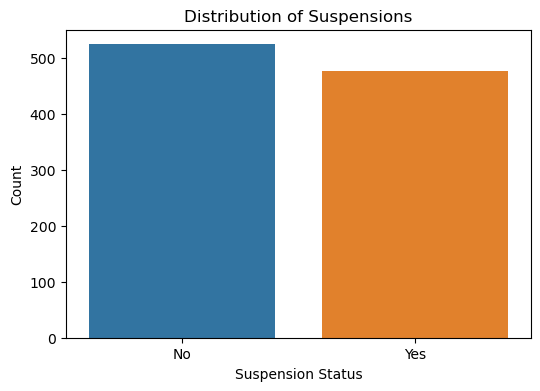

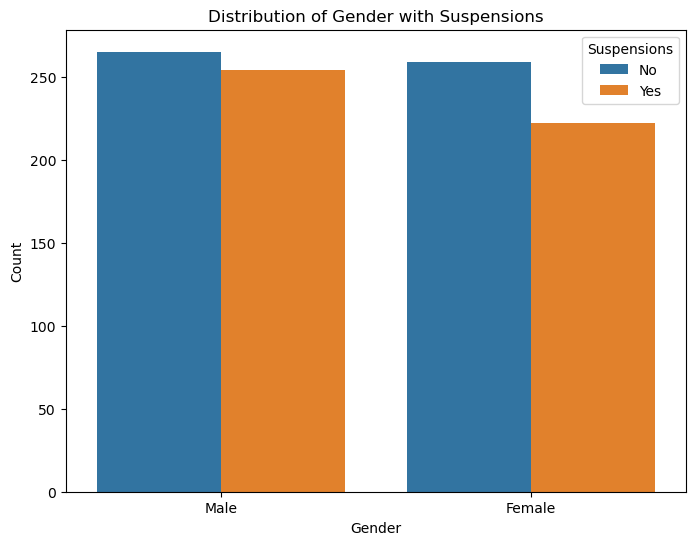

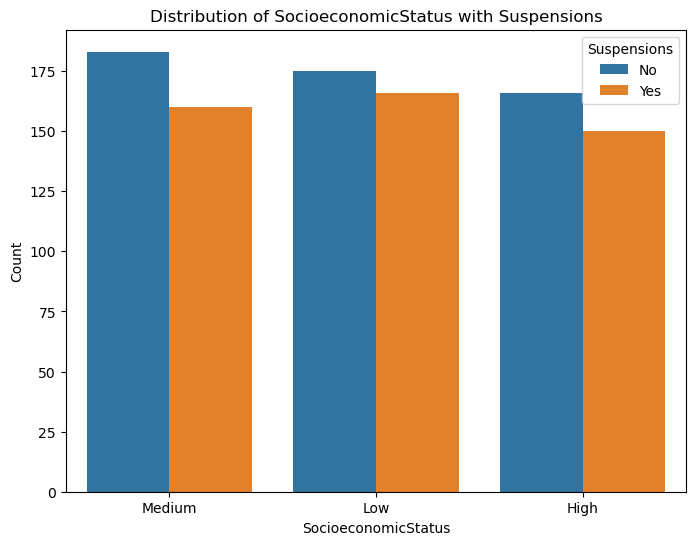

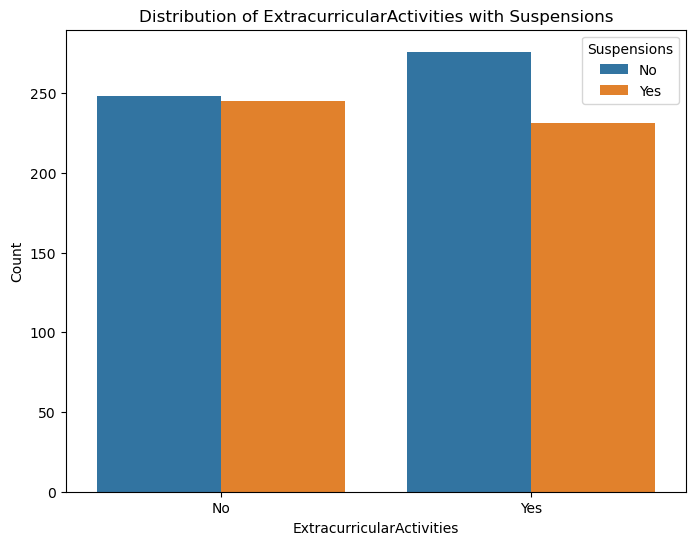

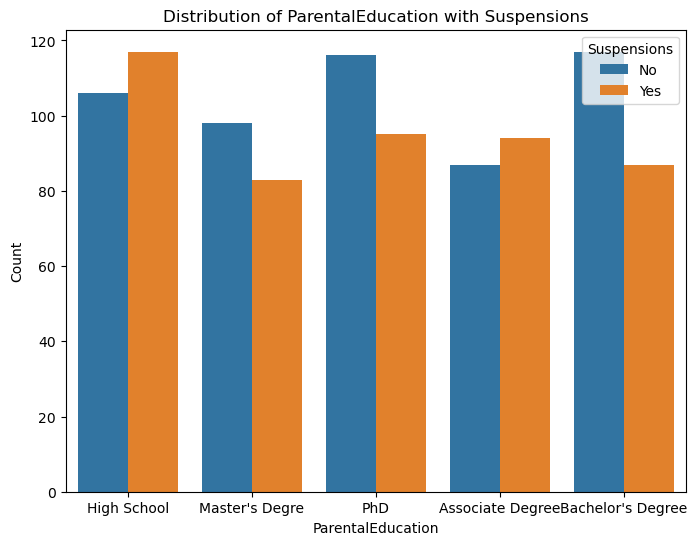

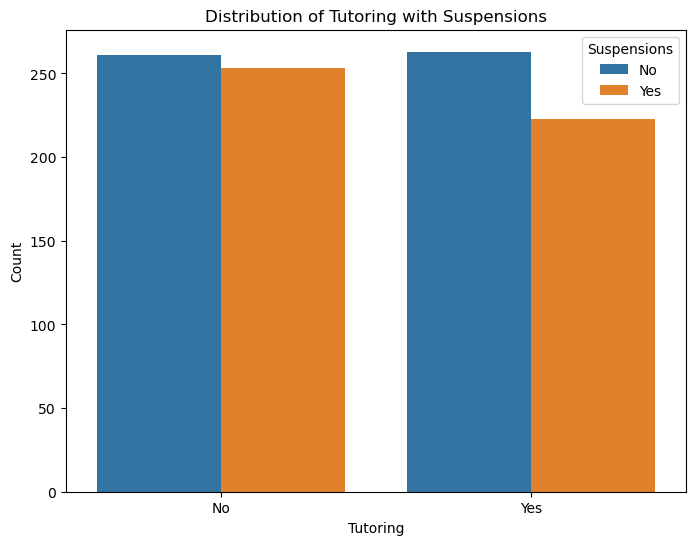

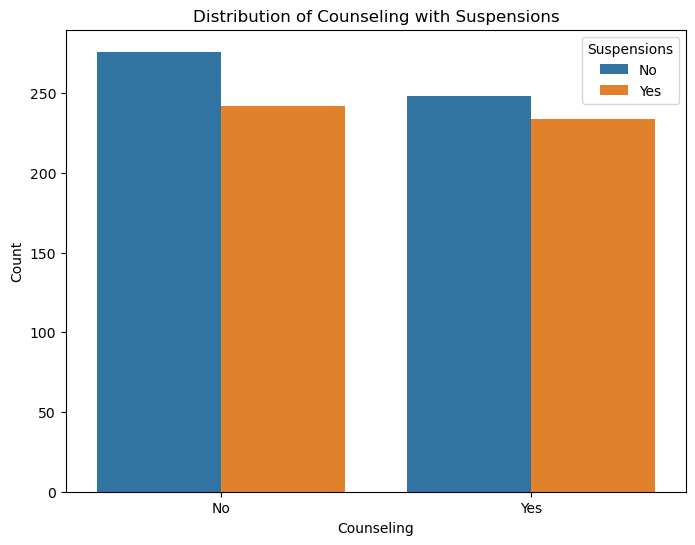

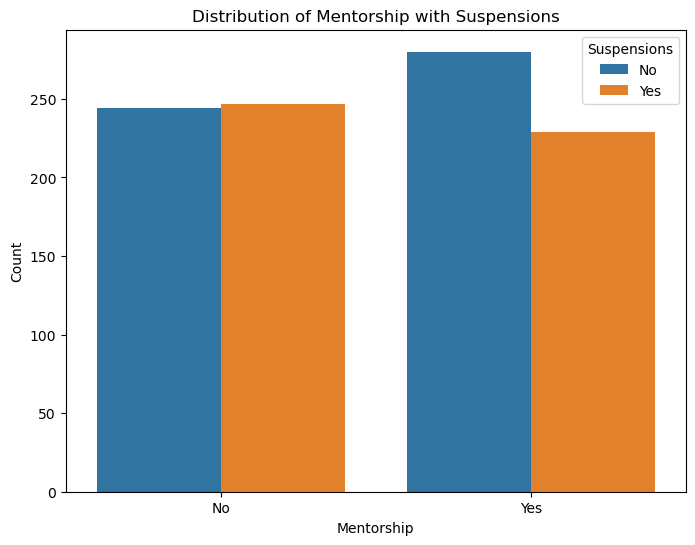

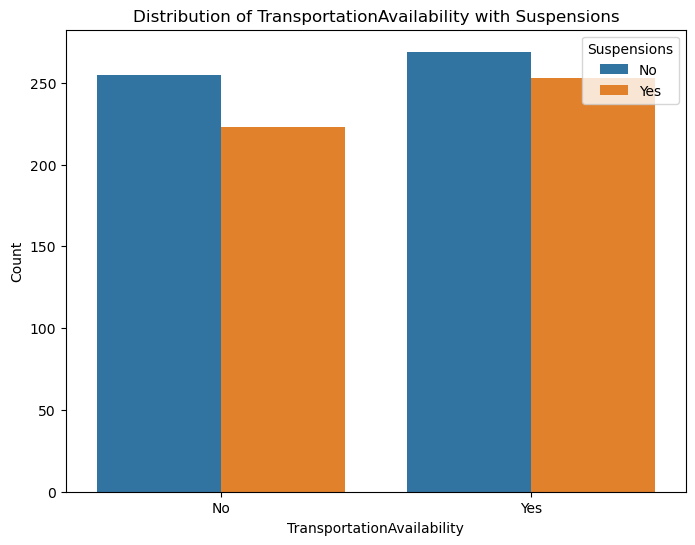

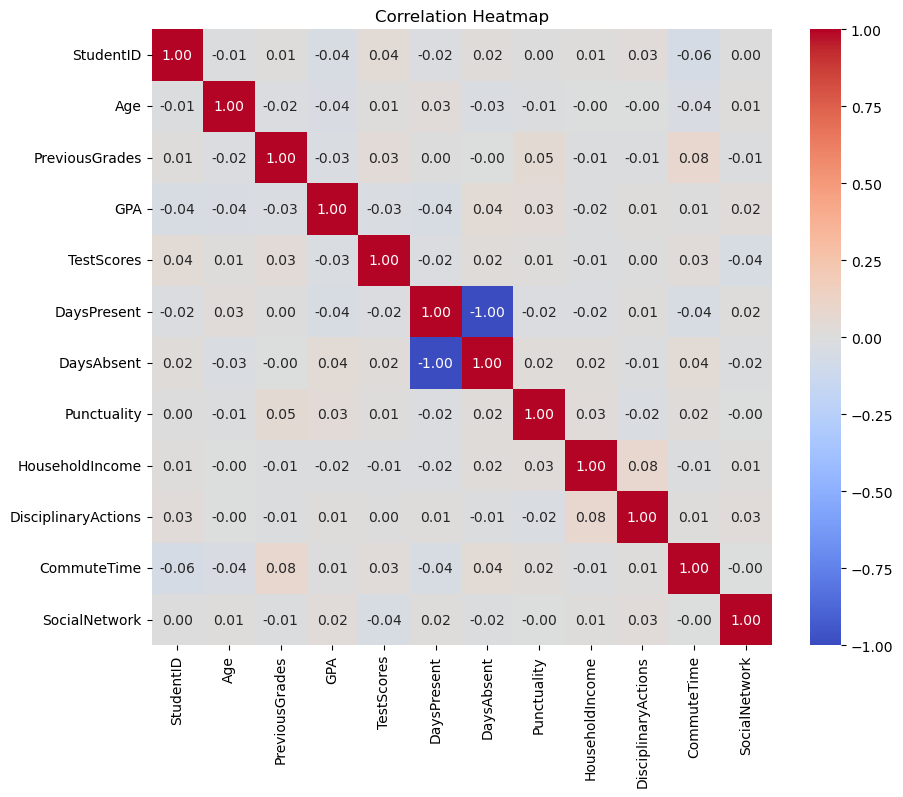

In [12]:


# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Distribution of the target variable 'Suspensions'
plt.figure(figsize=(6, 4))
sns.countplot(x='Suspensions', data=data)
plt.title('Distribution of Suspensions')
plt.xlabel('Suspension Status')
plt.ylabel('Count')
plt.show()

# Distribution of categorical variables
categorical_features = ['Gender', 'SocioeconomicStatus', 'ExtracurricularActivities', 'ParentalEducation', 'Tutoring', 'Counseling', 'Mentorship', 'TransportationAvailability']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data, hue='Suspensions')
    plt.title(f'Distribution of {feature} with Suspensions')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Suspensions', loc='upper right')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Train the logistic regression model



# Load the dataset
data = pd.read_csv('student_dropout_dataset.csv')

# Preprocess the data
X = data.drop(columns=['Ethnicity', 'Suspensions'])  # Drop irrelevant columns
y = data['Suspensions']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
categorical_features = ['Gender', 'SocioeconomicStatus', 'ExtracurricularActivities', 'ParentalEducation', 'Tutoring', 'Counseling', 'Mentorship', 'TransportationAvailability']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = classifier.predict(X_test_scaled)

# Example usage
student_id = 1  # Example student ID
student_data = data[data['StudentID'] == student_id]

# Check if student ID exists in the dataset
if student_data.empty:
    print("Student ID not found in the dataset.")
else:
    # Extract features for the student
    student_features = student_data.drop(columns=['Suspensions'])

    # Encode categorical variables for the student
    student_features_encoded = ct.transform(student_features)

    # Scale features for the student
    student_features_scaled = scaler.transform(student_features_encoded)

    # Make prediction for the student
    prediction = classifier.predict(student_features_scaled)
    if prediction[0] == 0:
        print("The student is likely to stay.")
    else:
        print("The student is at risk of dropping out.")


The student is at risk of dropping out.


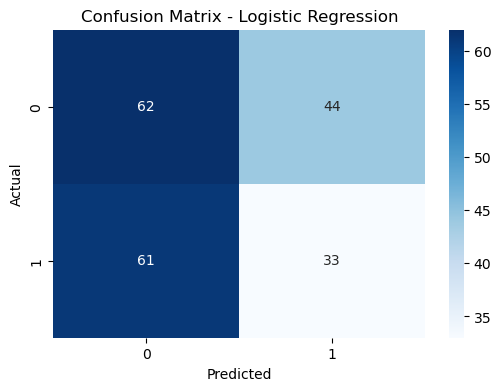

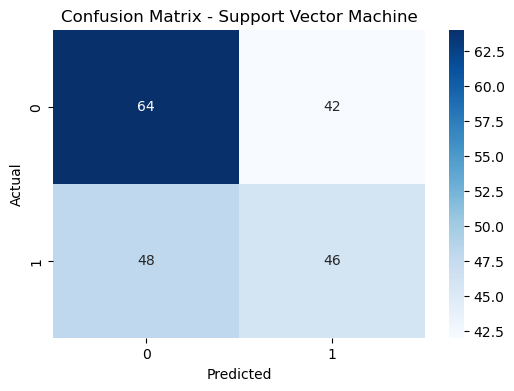

C:\Users\Siva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


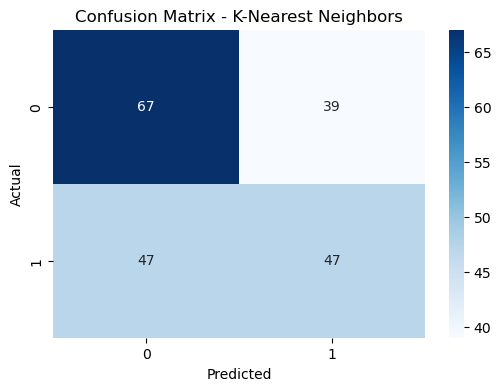

In [2]:

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)



svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)



knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, logistic_regression_model.predict(X_test_scaled), 'Logistic Regression')

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm_model.predict(X_test_scaled), 'Support Vector Machine')

# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn_model.predict(X_test_scaled), 'K-Nearest Neighbors')


In [3]:
from sklearn.metrics import classification_report

# Define function to generate classification report
def generate_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred)
    print(f"Classification Report - {title}:")
    print(report)

# Generate classification report for Logistic Regression
logistic_regression_report = classification_report(y_test, logistic_regression_model.predict(X_test_scaled))
print("Classification Report - Logistic Regression:")
print(logistic_regression_report)

# Generate classification report for SVM
svm_report = classification_report(y_test, svm_model.predict(X_test_scaled))
print("Classification Report - Support Vector Machine:")
print(svm_report)

# Generate classification report for KNN
knn_report = classification_report(y_test, knn_model.predict(X_test_scaled))
print("Classification Report - K-Nearest Neighbors:")
print(knn_report)


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

          No       0.50      0.58      0.54       106
         Yes       0.43      0.35      0.39        94

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.47      0.47      0.47       200

Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

          No       0.57      0.60      0.59       106
         Yes       0.52      0.49      0.51        94

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

          No       0.59      0.63      0.61       106
         Yes       0.55      0.50      0.52        94

    accuracy                           0.57 

C:\Users\Siva\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


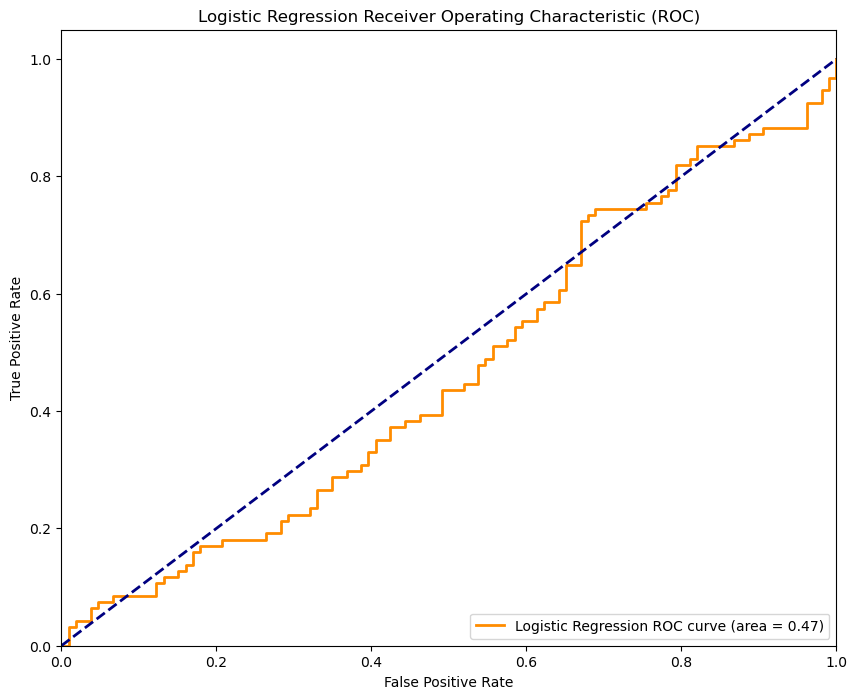

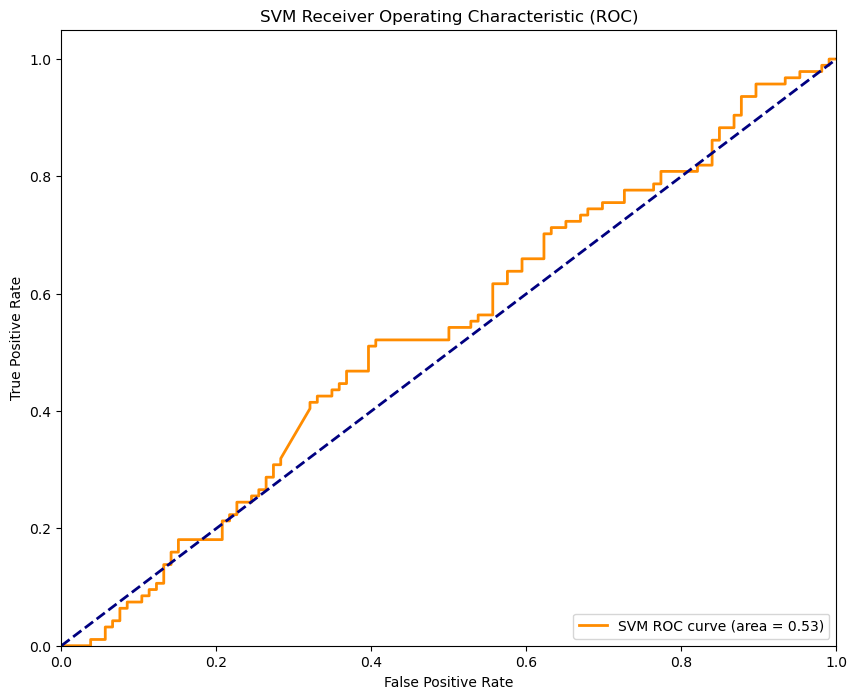

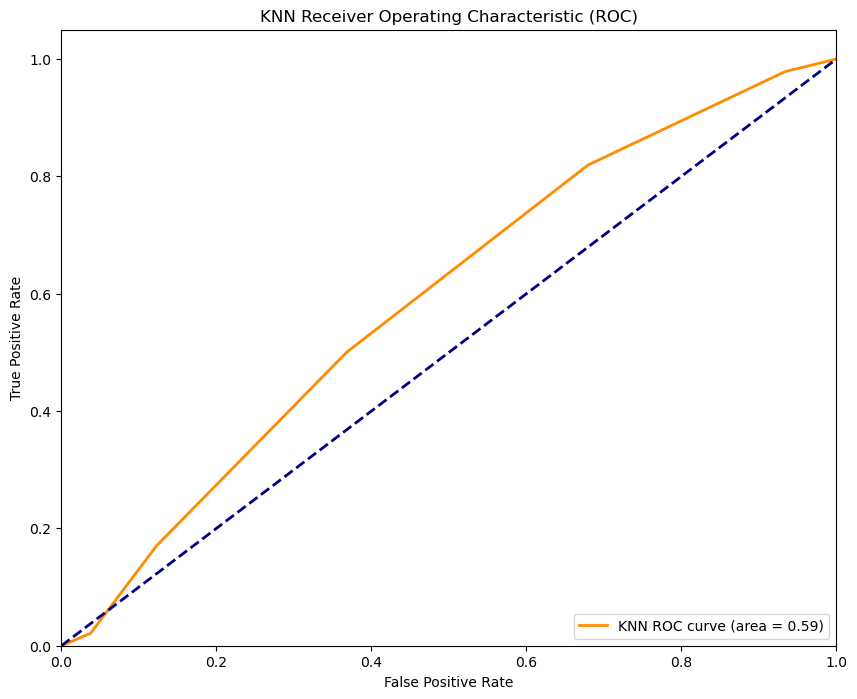

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc(classifier, X_train, y_train, X_test, y_test, classifier_name):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Get predicted probabilities for the positive class (class 1)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Map 'Yes' to 1 and 'No' to 0 in y_test
    y_test_numeric = y_test.map({'Yes': 1, 'No': 0})

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{classifier_name} ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
logistic_regression = LogisticRegression()
svm_classifier = SVC(probability=True)
knn_classifier = KNeighborsClassifier()

plot_roc_auc(logistic_regression, X_train_scaled, y_train, X_test_scaled, y_test, "Logistic Regression")
plot_roc_auc(svm_classifier, X_train_scaled, y_train, X_test_scaled, y_test, "SVM")
plot_roc_auc(knn_classifier, X_train_scaled, y_train, X_test_scaled, y_test, "KNN")


# Final Model

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('student_dropout_dataset.csv')

# Preprocess the data
X = data.drop(columns=['Ethnicity', 'Suspensions'])  # Drop irrelevant columns
y = data['Suspensions']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
categorical_features = ['Gender', 'SocioeconomicStatus', 'ExtracurricularActivities', 'ParentalEducation', 'Tutoring', 'Counseling', 'Mentorship', 'TransportationAvailability']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Function to predict for a given student ID
def predict_dropout(student_id):
    # Example usage
    student_data = data[data['StudentID'] == student_id]

    # Check if student ID exists in the dataset
    if student_data.empty:
        print("Student ID not found in the dataset.")
    else:
        # Extract features for the student
        student_features = student_data.drop(columns=['Suspensions'])

        # Encode categorical variables for the student
        student_features_encoded = ct.transform(student_features)

        # Scale features for the student
        student_features_scaled = scaler.transform(student_features_encoded)

        # Make prediction for the student
        prediction = classifier.predict(student_features_scaled)
        if prediction[0] == 0:
            print("The student is likely to stay.")
        else:
            print("The student is at risk of dropping out.")
        # Exit after printing the result
        return True

# Get user input
while True:
    student_id = input("Enter the student ID (or 'quit' to exit): ")
    if student_id.lower() == 'quit':
        break
    else:
        try:
            student_id = int(student_id)
            if predict_dropout(student_id):
                break
        except ValueError:
            print("Invalid input. Please enter a valid student ID.")


Enter the student ID (or 'quit' to exit): 509
The student is at risk of dropping out.
